In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn import utils
from tqdm.notebook import tqdm
import os

In [2]:
df_train = pd.read_csv('./data/train_df.csv')

In [3]:
df_train.head()

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


In [4]:
# path_dir = './data/train_ex'
file_list = ['bottle-broken_large', 'bottle-broken_small', 'bottle-contamination', 'bottle-good',
 'cable-bent_wire', 'cable-cable_swap', 'cable-combined', 'cable-cut_inner_insulation',
 'cable-cut_outer_insulation', 'cable-good', 'cable-missing_cable', 'cable-missing_wire', 'cable-poke_insulation', 'capsule-crack',
 'capsule-faulty_imprint', 'capsule-good', 'capsule-poke', 'capsule-scratch',
 'capsule-squeeze', 'carpet-color', 'carpet-cut', 'carpet-good', 'carpet-hole',
 'carpet-metal_contamination', 'carpet-thread', 'grid-bent', 'grid-broken',
 'grid-glue', 'grid-good', 'grid-metal_contamination', 'grid-thread', 'hazelnut-crack',
 'hazelnut-cut', 'hazelnut-good', 'hazelnut-hole', 'hazelnut-print', 'leather-color',
 'leather-cut', 'leather-fold', 'leather-glue', 'leather-good', 'leather-poke',
 'metal_nut-bent', 'metal_nut-color', 'metal_nut-flip', 'metal_nut-good', 'metal_nut-scratch',
 'pill-color', 'pill-combined', 'pill-contamination', 'pill-crack', 'pill-faulty_imprint', 'pill-good',
 'pill-pill_type', 'pill-scratch', 'screw-good', 'screw-manipulated_front', 'screw-scratch_head',
 'screw-scratch_neck', 'screw-thread_side', 'screw-thread_top', 'tile-crack', 'tile-glue_strip',
 'tile-good', 'tile-gray_stroke', 'tile-oil', 'tile-rough', 'toothbrush-defective', 'toothbrush-good',
 'transistor-bent_lead', 'transistor-cut_lead', 'transistor-damaged_case', 'transistor-good',
 'transistor-misplaced', 'wood-color', 'wood-combined', 'wood-good', 'wood-hole', 'wood-liquid', 'wood-scratch', 'zipper-broken_teeth',
 'zipper-combined', 'zipper-fabric_border', 'zipper-fabric_interior', 'zipper-good',
 'zipper-rough', 'zipper-split_teeth', 'zipper-squeezed_teeth']
print(len(file_list))
file_dict = { f_name: n for n, f_name in enumerate(file_list)}

88


In [5]:
file_dict['bottle-broken_large']
# file_list

0

In [6]:
# 폴더 경로 설정
train_dir = './data/train'

# def labeling(img):
#     class_name = img.split('.')[0]
#     if class_name == 'cat':
#         return 0 
#     if class_name == 'dog':
#         return 1

def labeling(img_name):
    img_label = df_train[df_train['file_name']==img_name].iloc[0]['label']
    return file_dict[img_label]
    
# label data(t_data)와 pixel data(x_data)를 저장할 변수를 하나 만들어요!
x_data = []
t_data = []    

In [7]:
df_train[df_train['file_name']=='10000.png'].iloc[0]['label']

'transistor-good'

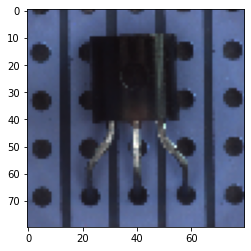

In [8]:
img_path = os.path.join(train_dir,'10000.png')
Image = cv.resize(cv.imread(img_path, cv.IMREAD_COLOR), (80,80))
Image.shape   # (1024, 1024, 3)
plt.imshow(Image)

In [9]:
for img in tqdm(os.listdir(train_dir),
                total=len(os.listdir(train_dir)),
                position=0,
                leave=True):
    
    label_data = labeling(img)
    
    img_path = os.path.join(train_dir,img)
    
    img_data = cv.resize(cv.imread(img_path, cv.IMREAD_COLOR), (80,80))
    
    t_data.append(label_data)
    x_data.append(img_data.ravel())    

  0%|          | 0/4277 [00:00<?, ?it/s]

In [10]:
t_df = pd.DataFrame({
    'label' : t_data
})
display(t_df.head())

,label
0,21
1,63
2,21
3,52
4,40


In [11]:
x_df = pd.DataFrame(x_data)
display(x_df.head())

,0,1,2,3,4,5,6,7,8,9,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,44,38,43,67,65,78,103,101,106,58,...,83,69,67,71,83,80,84,69,68,72
1,-116,-98,-109,83,92,91,125,-126,121,105,...,-107,95,102,105,-93,-94,-101,-97,-96,-101
2,25,17,18,65,62,68,81,75,71,58,...,68,42,39,40,60,54,56,76,71,73
3,24,15,15,26,15,17,28,16,16,26,...,15,23,15,15,23,15,15,28,17,17
4,72,87,123,58,68,105,62,75,113,51,...,109,55,67,105,59,72,106,59,73,105


In [12]:
# x_data와 t_data를 결합
df = pd.merge(t_df, x_df, left_index=True, right_index=True)
display(df.head())

,label,0,1,2,3,4,5,6,7,8,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,21,44,38,43,67,65,78,103,101,106,...,83,69,67,71,83,80,84,69,68,72
1,63,-116,-98,-109,83,92,91,125,-126,121,...,-107,95,102,105,-93,-94,-101,-97,-96,-101
2,21,25,17,18,65,62,68,81,75,71,...,68,42,39,40,60,54,56,76,71,73
3,52,24,15,15,26,15,17,28,16,16,...,15,23,15,15,23,15,15,28,17,17
4,40,72,87,123,58,68,105,62,75,113,...,109,55,67,105,59,72,106,59,73,105


In [13]:
# shuffle을 이용해서 dataframe의 row를 섞어줘요!
shuffle_df = utils.shuffle(df)
display(shuffle_df.head())

,label,0,1,2,3,4,5,6,7,8,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
3660,21,23,16,16,59,54,65,34,25,20,...,69,47,44,51,97,93,97,31,26,30
4058,61,123,125,-124,96,92,92,113,118,114,...,81,97,108,101,88,92,95,115,126,121
3392,63,-107,-85,-94,124,-119,-114,123,-120,-124,...,-128,123,126,124,103,113,114,-89,-83,-86
725,9,-89,-120,96,120,98,76,117,93,71,...,60,120,96,71,104,87,68,104,83,65
2391,40,54,65,96,59,70,104,61,73,110,...,98,54,67,104,65,79,116,56,65,98


In [14]:
# 최종적으로 만들어진 DataFrame을 파일로 저장!
shuffle_df.to_csv('./data/class_csv/train_0429_color_80.csv', index=False)